In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi']=150
plt.rcParams['figure.figsize']=(6,4)

# 1- Logistic Regression

In [2]:
data = pd.read_csv('ex2data1.txt', header=None)
data = data.values
X = data[:, 0:2]
X = np.hstack((np.ones((X.shape[0],1)), X))
Y = data[:, 2]

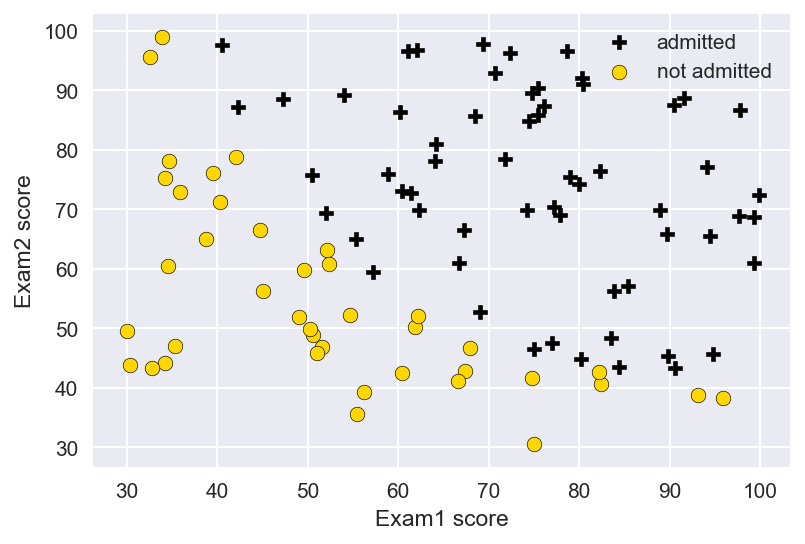

In [3]:
posX = X[Y == 1, :]
negX = X[Y == 0, :]
plt.scatter(posX[:, 1], posX[:, 2], marker='P', color='k', label='admitted')
plt.scatter(negX[:, 1], negX[:, 2], marker='o',
            color='gold', label='not admitted', edgecolor='k')
plt.legend()
plt.xlabel('Exam1 score')
plt.ylabel('Exam2 score')
plt.show()

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def cost(theta, X, Y):
    posX = X[Y == 1, :]
    negX = X[Y == 0, :]
    m = len(Y)
    return 1./m*(np.sum(-np.log(sigmoid(posX.dot(theta[:, np.newaxis])))) 
                 + np.sum(-np.log(1-sigmoid(negX.dot(theta[:, np.newaxis])))))


theta = np.array([0, 0, 0])


def grad(theta, X, Y):
    m = len(Y)
    return 1./m*np.dot(X.T, sigmoid(X.dot(theta[:, np.newaxis]))-Y[:, np.newaxis]).ravel()


cost(theta, X, Y)

0.6931471805599453

In [5]:
import warnings; warnings.simplefilter('ignore')
from scipy.optimize import minimize
x = minimize(cost, theta, args=(X, Y), method='BFGS', jac=grad,
             options={'gtol': 1e-6, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 26
         Function evaluations: 35
         Gradient evaluations: 31


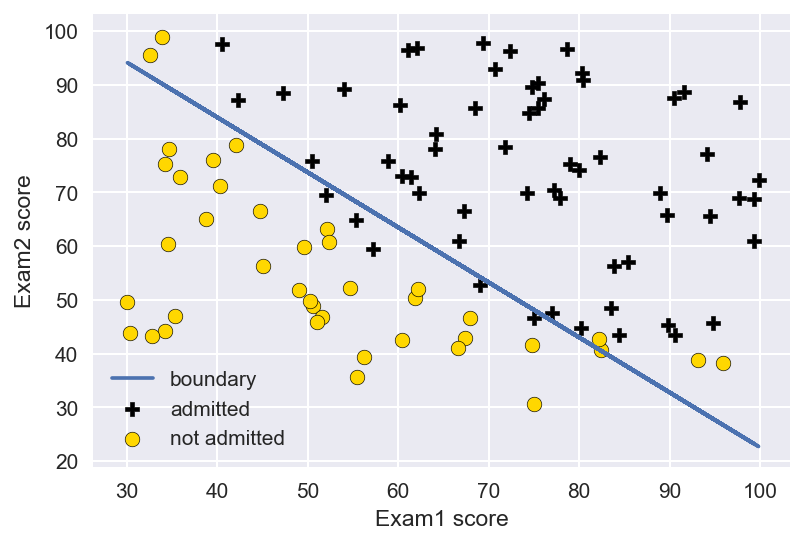

In [6]:
theta_ = x.x
X2b = -(theta_[1]*X[:, 1]+theta_[0])/theta_[2]
plt.scatter(posX[:, 1], posX[:, 2], marker='P', color='k', label='admitted')
plt.scatter(negX[:, 1], negX[:, 2], marker='o',
            color='gold', label='not admitted', edgecolor='k')
plt.plot(X[:, 1], X2b, label='boundary')
plt.legend()
plt.xlabel('Exam1 score')
plt.ylabel('Exam2 score')
plt.show()

# 2- Regularized Logistic Regression

In [7]:
data = pd.read_csv('ex2data2.txt', header=None)
data = (data.values)
X = data[:, 0:2]
Y = data[:, 2]

In [8]:
def poly_features(X, degree=6):
    out = np.ones((len(X), 1))
    for i in range(1, degree+1):
        for j in range(0, i+1):
            temp = (X[:, 0]**(i-j))*(X[:, 1]**j)
            out = np.concatenate((out, temp[:, np.newaxis]), 1)
    return out

In [9]:
def cost_reg(theta, X,Y,lamb):
    posX=X[Y==1,:]
    negX=X[Y==0,:]
    m=len(Y)
    return 1./m*(np.sum(-np.log(sigmoid(posX.dot(theta[:,np.newaxis]))))\
                      +sum(-np.log(1-sigmoid(negX.dot(theta[:,np.newaxis])))))\
                      +lamb/2/m*np.sum(theta[1:]**2)

def grad_reg(theta, X,Y,lamb):
    m=len(Y)
    grad=1./m*np.dot(X.T,sigmoid(X.dot(theta[:,np.newaxis]))-Y[:,np.newaxis]).ravel()
    grad[1:]=grad[1:]+lamb/m*(theta[1:])
    return grad

In [10]:
degree=6
out= poly_features(X, degree)
theta=np.zeros((out.shape[1],))
x=minimize(cost_reg, theta, args=(out,Y,1.), method='BFGS', jac=grad_reg,\
                options={'gtol': 1e-6, 'disp': False})
theta_=x.x
pred=out.dot(theta_[:,np.newaxis])>=0
np.mean(pred.ravel()==Y)

0.8305084745762712

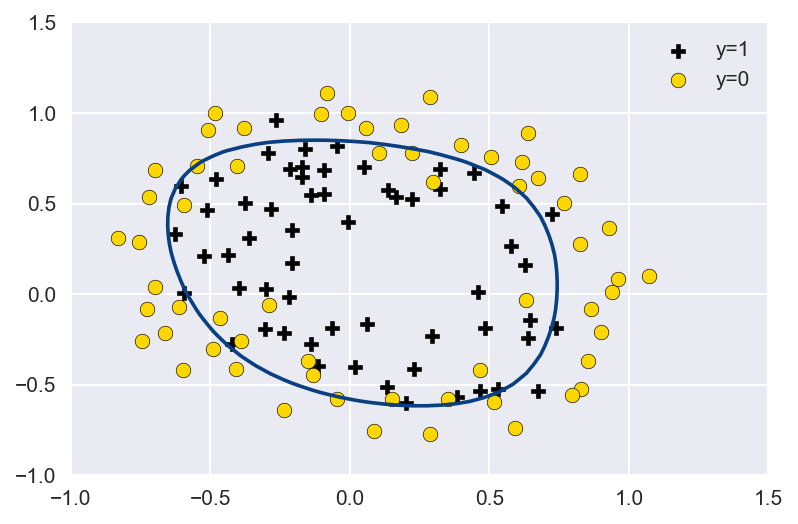

In [11]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)


z = np.zeros((len(u), len(v)))

for i in range(0, len(u)):
    for j in range(0, len(v)):
        t = 1
        for k in range(1, degree+1):
            for l in range(0, k+1):
                temp = (u[i]**(k-l))*(v[j]**l)
                t = np.append(t, temp)
        z[i, j] = t.dot(theta_[:, np.newaxis])


z = z.T

from matplotlib import cm
posX = X[Y == 1, :]
negX = X[Y == 0, :]
plt.scatter(posX[:, 0], posX[:, 1], marker='P', color='k', label='y=1')
plt.scatter(negX[:, 0], negX[:, 1], marker='o',
            color='gold', label='y=0', edgecolor='k')
plt.contour(u, v, z, [0], cmap=cm.GnBu_r)
plt.legend()
plt.show()